In [1]:
import AFT_tools as AFT
import matplotlib.pyplot as plt
from skimage import io
import numpy as np

# Demo AFT

In [2]:
im_UF=io.imread(r'C:\Users\Andy\OneDrive - The University of Chicago\UChicago\Gardel Lab\jupyter\training_data\actin\UF_8_w3491-zyla.tif')

In [13]:
x, y, u, v, im_theta, im_eccentricity = AFT.image_local_order(im_UF.T, window_size=65, overlap=0.5, save_path = '',
                                                             plot_overlay=False, plot_angles=False, plot_eccentricity=False,
                                                             save_figures=False)

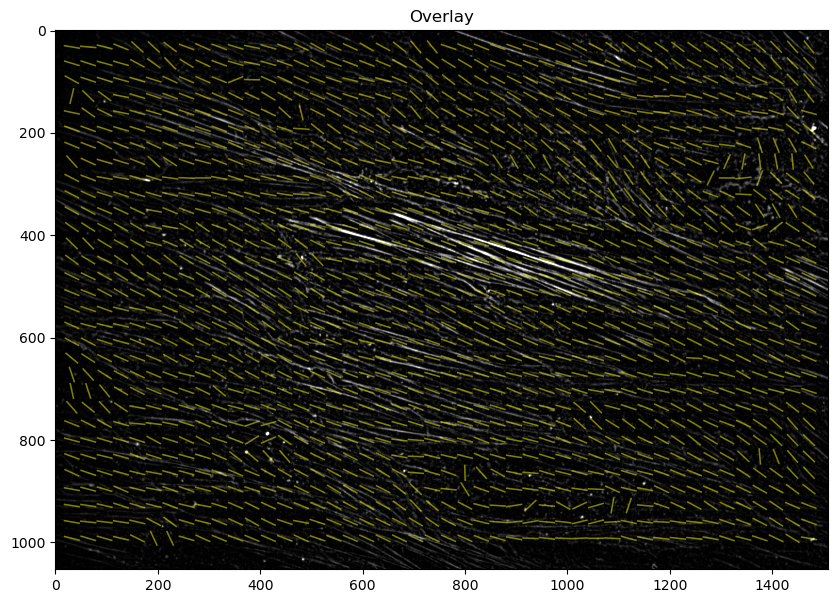

In [18]:
plt.figure(figsize=(15,7))
plt.imshow(im_UF.T, vmax=700, cmap='gray')
plt.quiver(x,y,u,v, color='yellow', pivot='mid', scale_units='xy', scale=0.5, headaxislength=0, headlength=0, width=0.002, alpha=0.5)
plt.title('Overlay')
plt.show()

In [3]:
DF_im=io.imread(r'C:\Users\Andy\OneDrive - The University of Chicago\UChicago\Gardel Lab\jupyter\training_data\actin\DF_17_w3491-zyla.tif')

In [4]:
x, y, u, v, im_theta, im_eccentricity = AFT.image_local_order(DF_im.T, window_size=45, overlap=0.5, save_path = '',
                                                             plot_overlay=False, plot_angles=False, plot_eccentricity=False,
                                                             save_figures=False)

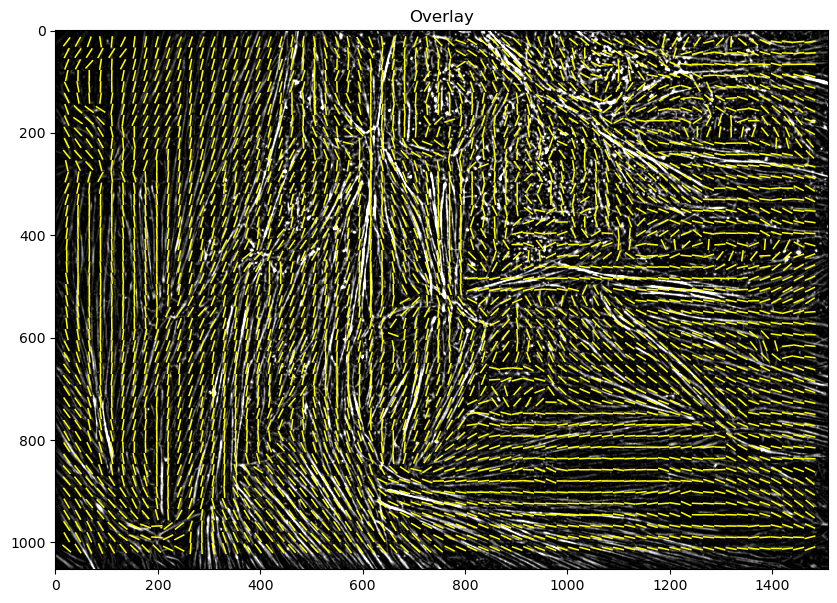

In [4]:
plt.figure(figsize=(15,7))
plt.imshow(DF_im.T, vmax=700, cmap='gray')
plt.quiver(x,y,u,v, color='yellow', pivot='mid', scale_units='xy', scale=0.5, headaxislength=0, headlength=0, width=0.002, alpha=1)
plt.title('Overlay')
plt.show()

In [8]:
from skimage.transform import resize

# interpolating actin orientation to image resolution
im_theta_x=np.cos(im_theta*2)
im_theta_y=np.sin(im_theta*2)
im_theta_interp_x=resize(im_theta_x.T, DF_im.shape)
im_theta_interp_y=resize(im_theta_y.T, DF_im.shape)

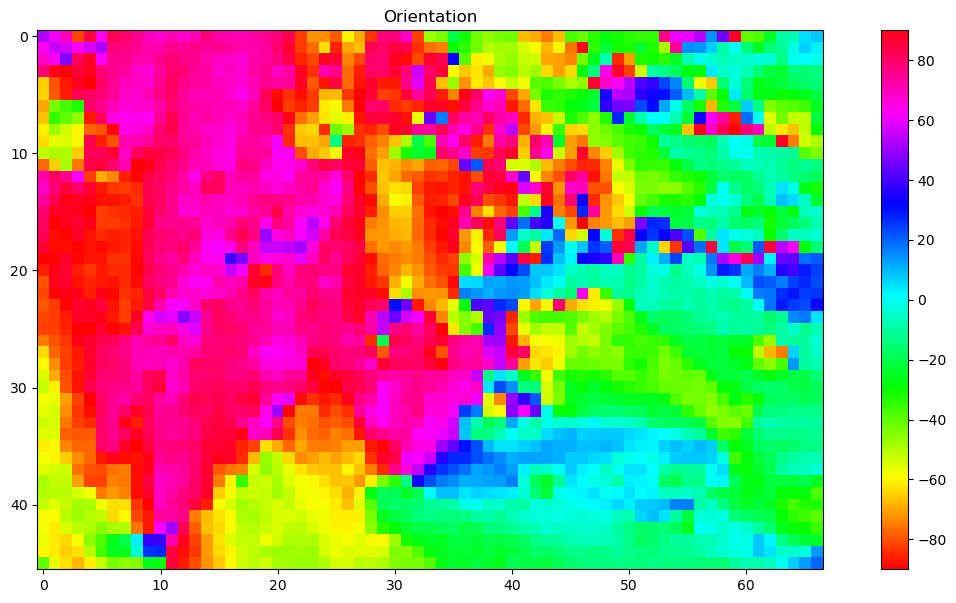

In [9]:
plt.figure(figsize=(15,7))
plt.imshow(im_theta * 180 / np.pi, vmin=-90, vmax=90, cmap='hsv')
plt.colorbar()
plt.title('Orientation')
plt.show()

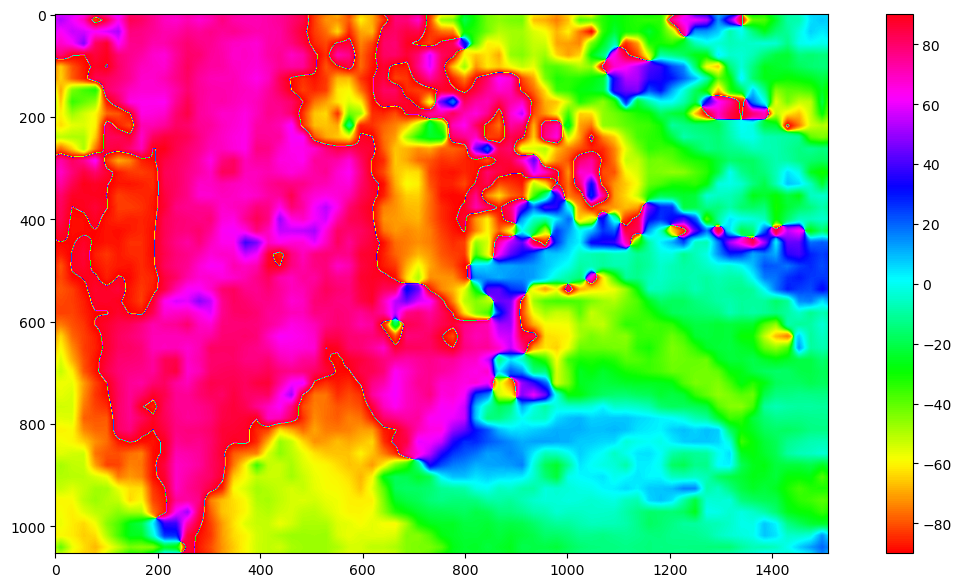

In [12]:
plt.figure(figsize=(15,7))
plt.imshow(np.degrees(np.arctan2(im_theta_interp_y, im_theta_interp_x).T/2), cmap='hsv')
plt.colorbar()

#plt.savefig('C:/Users/Andy/Desktop/test_img.tif', dpi=800, bbox_inches='tight', pad_inches=0)

# Actin alignment vs. cell outline

In [2]:
from segmented_comprehension import Image
from skimage.transform import resize

In [3]:
test_img=Image('C:/Users/Andy/Desktop/teloHAEC_seg/MAX_UF_1_w1642-zyla_seg.npy', load_img=True)

In [4]:
actin_channel=resize(io.imread(r'archive\training_data\actin\UF_1_w3491-zyla.tif'), test_img.masks.shape, preserve_range=True)

In [220]:
x, y, u, v, im_theta, im_eccentricity = AFT.image_local_order(actin_channel, window_size=100, overlap=0.4, save_path = '',
                                                             plot_overlay=False, plot_angles=False, plot_eccentricity=False,
                                                             save_figures=False)

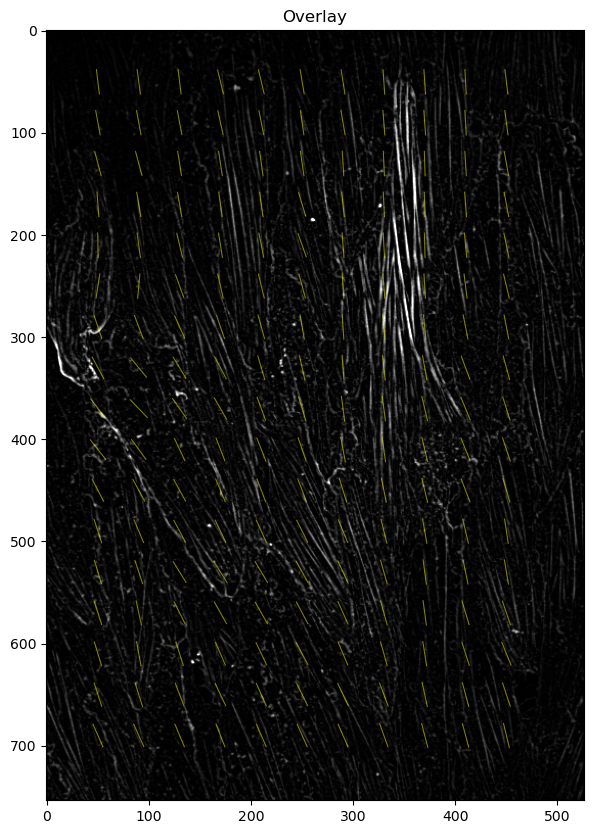

In [221]:
plt.figure(figsize=(7,10))
plt.imshow(actin_channel, vmax=1000, cmap='gray')
plt.quiver(x,y,u,v, color='yellow', pivot='mid', scale_units='xy', scale=1, headaxislength=0, headlength=0, width=0.002, alpha=0.5)
plt.title('Overlay')
plt.show()

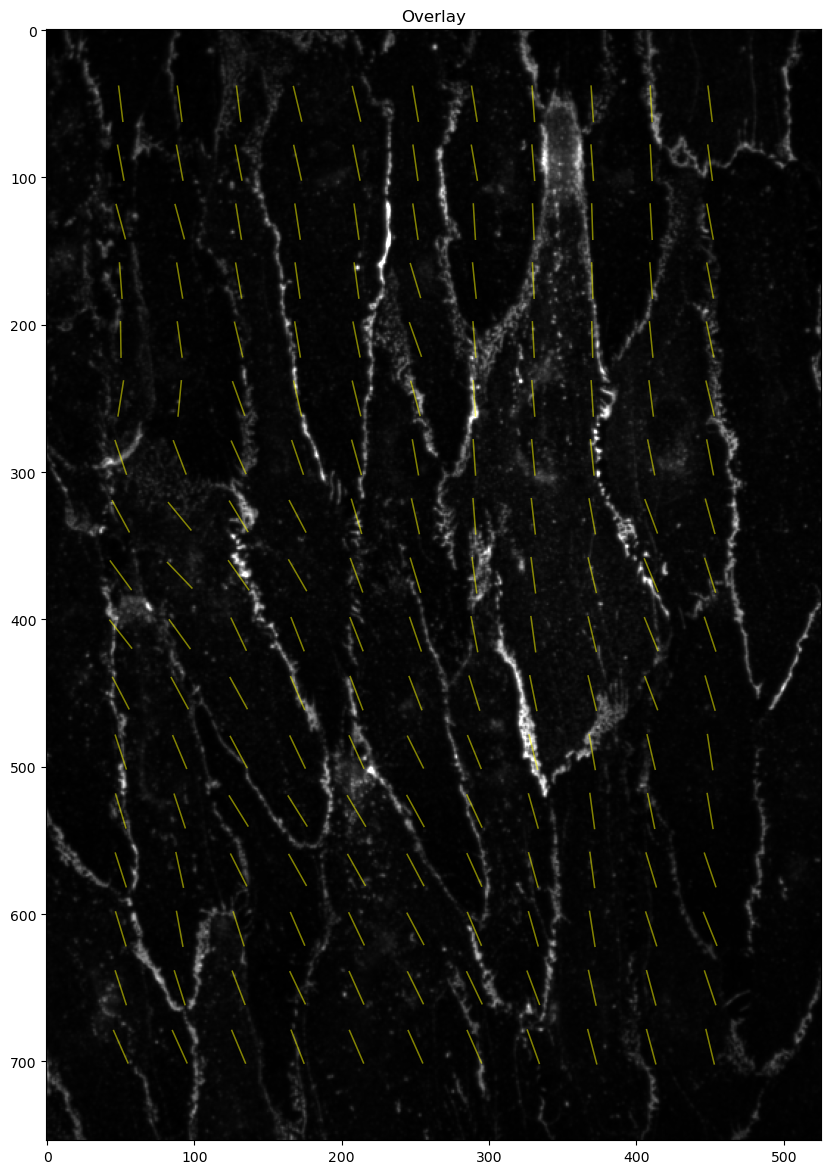

In [222]:
plt.figure(figsize=(10,15))
plt.imshow(test_img.img, cmap='gray', vmax=120)
plt.quiver(x,y,u,v, color='yellow', pivot='mid', scale_units='xy', scale=1, headaxislength=0, headlength=0, width=0.002, alpha=0.5)
plt.title('Overlay')
plt.show()

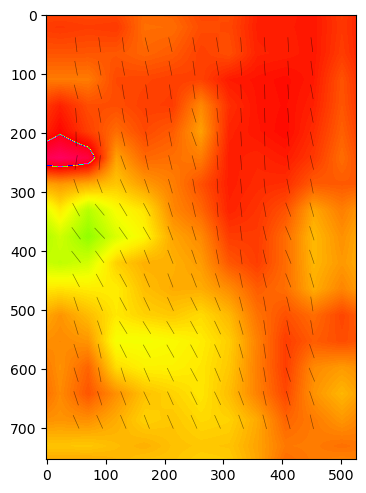

In [223]:
from skimage.transform import resize

# interpolating actin orientation to image resolution
im_theta_x=np.cos(im_theta*2)
im_theta_y=np.sin(im_theta*2)
im_theta_interp_x=resize(im_theta_x, actin_channel.shape, order=1)
im_theta_interp_y=resize(im_theta_y, actin_channel.shape, order=1)
im_theta_interp=np.degrees(np.arctan2(im_theta_interp_y, im_theta_interp_x)/2)

plt.figure(figsize=(4,6))
plt.imshow(im_theta_interp, cmap='hsv')
plt.quiver(x,y,u,v, color='k', pivot='mid', scale_units='xy', scale=1, headaxislength=0, headlength=0, width=0.002, alpha=0.5)

#plt.savefig('C:/Users/Andy/Desktop/test_img.tif', dpi=800, bbox_inches='tight', pad_inches=0)

In [346]:
from celltool.contour import contour_class
import celltool.simple_interface as ct

cell_n=12

contour=contour_class.Contour(points=test_img.cells[cell_n].outline)
smoothed_contour=contour.as_resampled(num_points=100, smoothing=0.1)

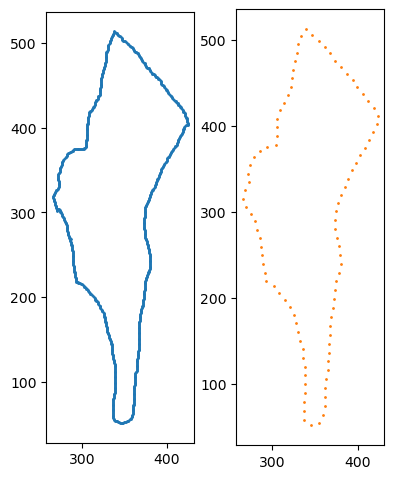

In [347]:
fig, axes=plt.subplots(1,2,figsize=(4,5), subplot_kw={'aspect':1})
axes[0].scatter(*test_img.cells[cell_n].outline.T, s=1)
axes[1].scatter(*smoothed_contour.points.T, color='C1', s=1)
fig.tight_layout()

In [327]:
composite=io.imread('C:/Users/Andy/Desktop/Composite (RGB).tif')

In [328]:
composite.shape

(754, 526, 3)

(-0.5, 525.5) (753.5, -0.5)


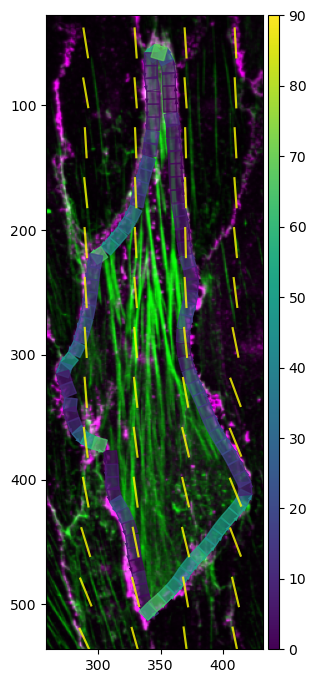

In [350]:
from scipy import interpolate
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl

plt.figure(figsize=(3,10))
plt.imshow(composite)
#plt.imshow(im_theta_interp, cmap='hsv')
#plt.colorbar()

colormap=plt.cm.viridis

for n, segment in enumerate(zip(smoothed_contour.points, np.roll(smoothed_contour.points, -1, axis=0))):
    points=np.array(segment)
    displacement=np.diff(points, axis=0).flatten()
    length=np.linalg.norm(displacement)
    angle=np.arctan2(*np.flip(displacement))
    # get little box corresponding to buffered segment
    box_offset=length*np.array([np.sin(angle), -np.cos(angle)])
    box=np.concatenate([np.flip(points, axis=0), points+box_offset])


    # interpolate to get mean actin orientation in the box
    # shape order is wrong
    interp_theta=-interpolate.interpn(points=[np.linspace(0,img_shape,AFT_shape) for img_shape, AFT_shape in zip(test_img.masks.shape, im_theta.shape)], values=im_theta, xi=np.flip(box, axis=1))
    #if n==20:
        #break
    # zero to segment orientation
    zeroed_angle=np.abs((np.mean(interp_theta)-angle+np.pi/2)%np.pi-np.pi/2)
    color=colormap(np.degrees(zeroed_angle)/90)
    plt.arrow(*points[0], *displacement, width=0.5, head_width=3, edgecolor='none', facecolor=color, length_includes_head=True)
    plt.fill(*box.T, color=color, alpha=0.7)

plt.gca().set_aspect(1)
print(plt.xlim(), plt.ylim())
plt.xlim(258.43390505496546, 432.0583828213749)
plt.ylim(535.90547042975,28.029906804378776)
plt.quiver(x,y,u,v, color='yellow', pivot='mid', scale_units='xy', scale=1, headaxislength=0, headlength=0, width=0.01, alpha=0.8)

divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)    
cb1 = mpl.colorbar.ColorbarBase(ax_cb, cmap=plt.cm.viridis, norm=mpl.colors.Normalize(vmin=0, vmax=90), orientation='vertical')

plt.gcf().add_axes(ax_cb)

plt.scatter(*smoothed_contour.points[0].T, color='white', s=3)

#plt.colorbar()

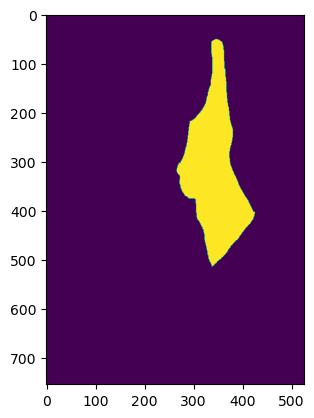

In [343]:
plt.imshow(test_img.masks==13)

In [69]:
import shapely
poly=shapely.LineString(np.concatenate([smoothed_contour.points, [smoothed_contour.points[0]]]))
offset_poly=shapely.offset_curve(shapely.LineString(smoothed_contour.points), -10)

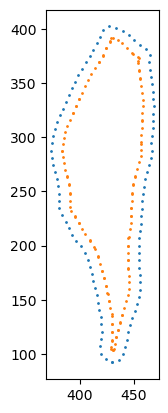

In [70]:
plt.scatter(*np.array(poly.coords).T, s=1)
plt.scatter(*np.array(offset_poly.coords).T, s=1)
plt.gca().set_aspect('equal')

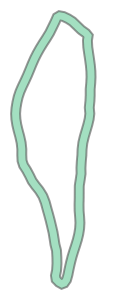

In [76]:
poly.buffer(-10, single_sided=True)